<a href="https://www.kaggle.com/code/zain18j2000/yolov8?scriptVersionId=156336820" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current dpip install ultralyticsirectory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="5g4Z0vI4JpbhFTOrkXk9")
project = rf.workspace("zix6").project("sixray100")
dataset = project.version(1).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.229, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to sixray100-1 in yolov8:: 100%|██████████| 212/212 [00:00<00:00, 6299.00it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8n.pt')
#yolo8_model_detection.predict(source='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1200px-I-80_Eastshore_Fwy.jpg',save_txt=True ,save=True,exist_ok=True)
#Image(filename='runs/detect/predict/1200px-I-80_Eastshore_Fwy.jpg', height=300,width=500) 

100%|██████████| 6.23M/6.23M [00:00<00:00, 45.3MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [7]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/sixray100-1 datasets/sixray100-1

# **TRAIN MODEL**

In [8]:
# Define dataset path, epochs, image-size, Bacth and output directory.
yolo8_model_detection.train(data='sixray100-1/data.yaml', epochs=50, imgsz=640, batch=64,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=sixray100-1/data.yaml, epochs=50, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 9.06MB/s]
2023-12-24 17:29:25,063	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-24 17:29:26,001	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/datasets/sixray100-1/sixray100-1/train/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 1093.84it/s]

train: New cache created: /kaggle/working/datasets/sixray100-1/sixray100-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/sixray100-1/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 595.24it/s]

val: New cache created: /kaggle/working/datasets/sixray100-1/sixray100-1/valid/labels.cache


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.83G      2.198       3.58      1.898        296        640: 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all         20         60    0.00405      0.388     0.0192    0.00771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.77G      2.145      3.534      1.895        308        640: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         20         60    0.00497      0.476     0.0229    0.00833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.79G      2.227       3.55      1.946        371        640: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         20         60    0.00494      0.467      0.024    0.00779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.77G      2.054        3.5      1.888        296        640: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all         20         60    0.00518      0.489     0.0258    0.00816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.79G      2.163      3.566      1.934        322        640: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20         60    0.00538      0.502     0.0268    0.00873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.75G      2.204      3.554       1.97        349        640: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         20         60    0.00529      0.499     0.0289    0.00974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.83G      2.243      3.519      2.032        307        640: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         20         60    0.00528      0.495     0.0338     0.0142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       5.8G      1.915      3.419      1.767        293        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         20         60    0.00643      0.632     0.0758     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.82G      1.834      3.344       1.67        301        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         20         60    0.00644      0.618      0.147     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.83G       1.65      3.169      1.575        320        640: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         20         60    0.00642      0.605      0.201     0.0895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.79G       1.62      2.989      1.484        289        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all         20         60    0.00703      0.654      0.211     0.0989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.83G      1.639      2.843      1.497        295        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all         20         60    0.00751      0.713      0.224      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.82G      1.721      2.635      1.516        323        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         60    0.00857      0.811      0.297      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.82G      1.551      2.534       1.42        303        640: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         20         60    0.00897      0.838      0.313      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.84G      1.564      2.451      1.395        300        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         60      0.756      0.208      0.393      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.84G      1.535      2.383      1.391        322        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


                   all         20         60       0.13       0.87      0.468      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.84G      1.414      2.138      1.327        282        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         20         60     0.0101      0.977      0.518      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.82G      1.524      2.069      1.418        301        640: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         20         60     0.0099      0.964      0.543      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.82G      1.477       1.82      1.358        322        640: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         20         60    0.00998      0.987      0.552      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.83G      1.388      1.703       1.29        358        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         20         60    0.00973      0.964      0.534      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.83G      1.348      1.696      1.324        302        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all         20         60    0.00946      0.951      0.513      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.84G      1.362      1.664      1.294        319        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         20         60     0.0325      0.879      0.525      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.84G      1.381      1.633      1.299        304        640: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         20         60          1     0.0741      0.524      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.82G      1.392       1.63      1.287        323        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         20         60          1     0.0682      0.524      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.84G      1.337      1.586      1.229        312        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         20         60          1     0.0705      0.473      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.79G      1.291      1.504      1.221        337        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         20         60          1      0.078      0.447      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.83G      1.306      1.509      1.265        312        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         20         60          1      0.119       0.47      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.84G      1.235      1.491      1.224        306        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         60          1      0.117      0.452      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.82G      1.273      1.502       1.23        281        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20         60          1      0.104      0.474      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.83G      1.185      1.375      1.173        344        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         20         60          1      0.109      0.537      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.79G      1.239      1.431      1.228        307        640: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         20         60          1      0.149      0.551      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.79G      1.209      1.337       1.19        313        640: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         20         60          1      0.161       0.55      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.84G      1.157       1.35        1.2        326        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


                   all         20         60      0.984      0.171       0.56      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.82G      1.175       1.38       1.18        314        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         20         60      0.935      0.176      0.553      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.84G      1.145      1.288      1.167        342        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         60      0.919      0.197      0.554      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.84G      1.139      1.236      1.163        344        640: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         20         60      0.898      0.205      0.587       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.81G      1.111      1.244      1.133        317        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         20         60      0.929      0.238       0.59      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.82G      1.124      1.325      1.171        277        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         20         60      0.939      0.282      0.589      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.82G       1.13      1.327      1.164        285        640: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         20         60      0.956      0.289      0.574      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       5.8G      1.127      1.237      1.166        341        640: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         60      0.939      0.289      0.551      0.254


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.84G     0.9936      1.403      1.117        150        640: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         20         60      0.934      0.262      0.536      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.84G      1.004      1.379      1.111        154        640: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         20         60       0.95      0.224      0.464      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.84G     0.9794      1.337      1.053        154        640: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         20         60      0.987      0.211      0.459      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.84G      0.932      1.262      1.067        156        640: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         20         60          1      0.205      0.455      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.84G     0.9347      1.289       1.08        151        640: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         20         60          1      0.189      0.507      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.84G     0.9385      1.274      1.052        153        640: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         60          1      0.187      0.514      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.84G     0.9387      1.276      1.062        149        640: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         20         60          1      0.197      0.519      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.84G     0.9087      1.266      1.085        156        640: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         20         60          1      0.197      0.528      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.84G     0.9267       1.25      1.058        156        640: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         20         60          1      0.215       0.55      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.84G     0.8556      1.184      1.043        153        640: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         20         60          1      0.229      0.557      0.282



50 epochs completed in 0.028 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 6.2MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 6.2MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]


                   all         20         60      0.897      0.204      0.587      0.289
                   Gun         20         22          1          0      0.487      0.174
                 Knife         20         38      0.795      0.408      0.686      0.404
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d19f660c190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **VAIDATE MODEL**

In [9]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model

# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/sixray100-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


                   all         20         60      0.898      0.204      0.587      0.288
                   Gun         20         22          1          0      0.486      0.171
                 Knife         20         38      0.795      0.409      0.688      0.404
Speed: 0.2ms preprocess, 9.2ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


array([    0.17123,     0.40407])

# **MODEL TESTING**


image 1/30 /kaggle/working/sixray100-1/test/images/P00007_jpg.rf.ab21a89be07317ce4b62b84b00f21c29.jpg: 384x640 (no detections), 64.4ms
image 2/30 /kaggle/working/sixray100-1/test/images/P00008_jpg.rf.82490c1f2782b7acf29104bbbe3242b5.jpg: 416x640 (no detections), 53.3ms
image 3/30 /kaggle/working/sixray100-1/test/images/P00010_jpg.rf.9e3a053979d4d917c5f45b0e5c5049cb.jpg: 416x640 (no detections), 6.0ms
image 4/30 /kaggle/working/sixray100-1/test/images/P00013_jpg.rf.ed429ea4b181af60dab4ccfc3eca5e0c.jpg: 352x640 (no detections), 52.9ms
image 5/30 /kaggle/working/sixray100-1/test/images/P00018_jpg.rf.ee37de63d39272bea52a5c7a92b01429.jpg: 320x640 (no detections), 52.7ms
image 6/30 /kaggle/working/sixray100-1/test/images/P00021_jpg.rf.8e33214e41beaeb98889cecd9077d855.jpg: 384x640 (no detections), 7.3ms
image 7/30 /kaggle/working/sixray100-1/test/images/P00022_jpg.rf.e000e3e569a9533c13f37d9073e911e4.jpg: 384x640 (no detections), 6.7ms
image 8/30 /kaggle/working/sixray100-1/test/images/P00027

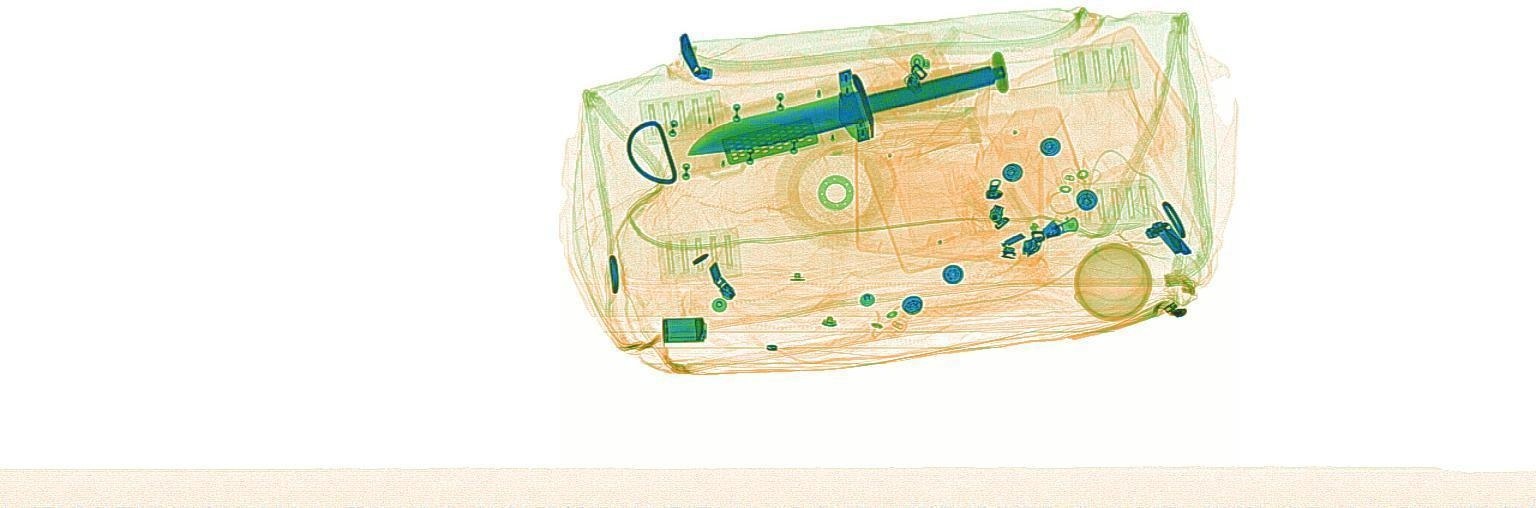

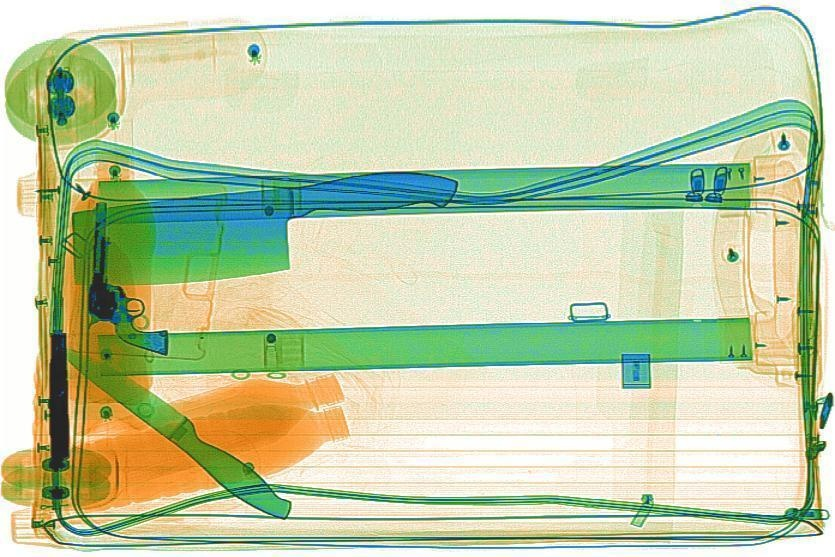

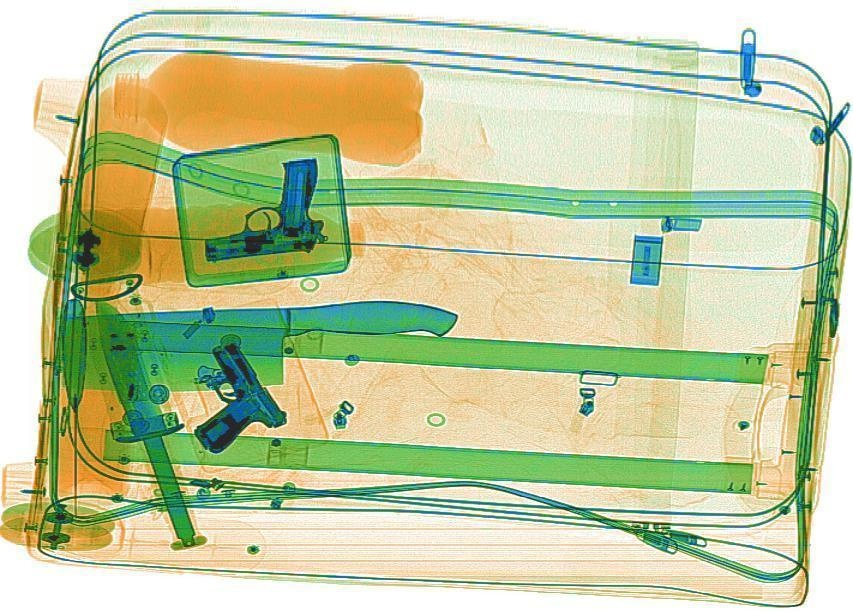

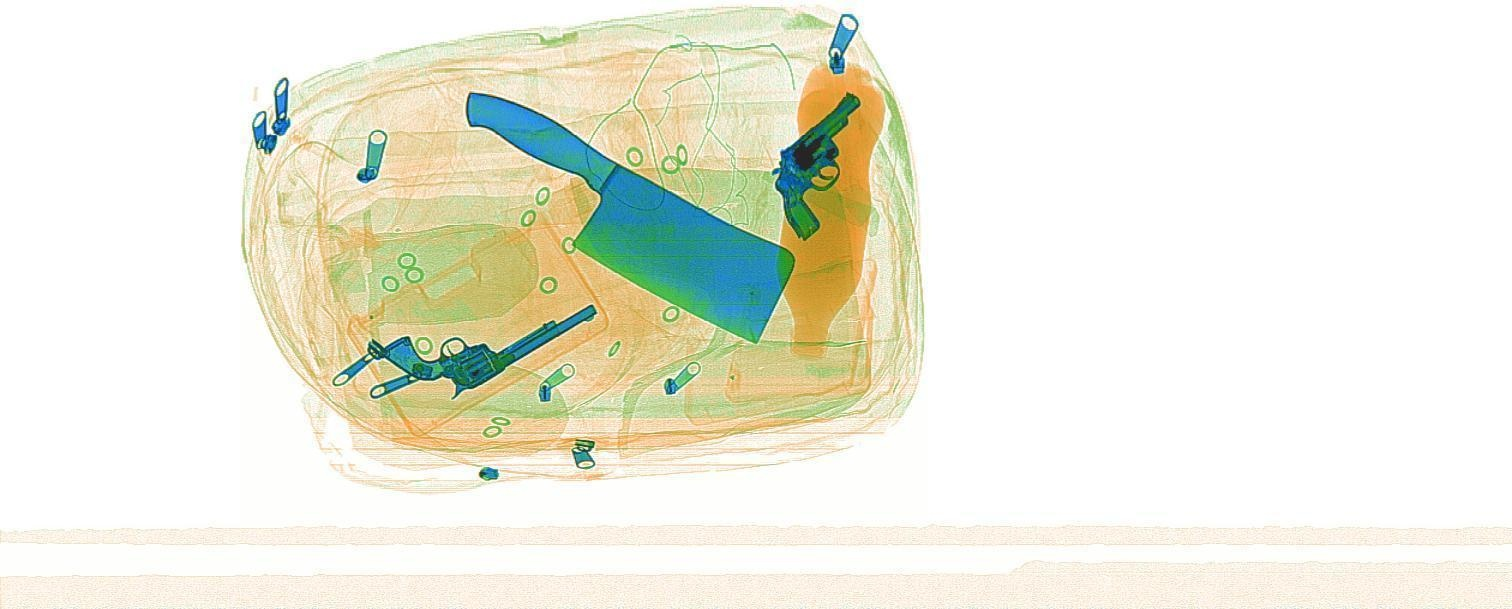

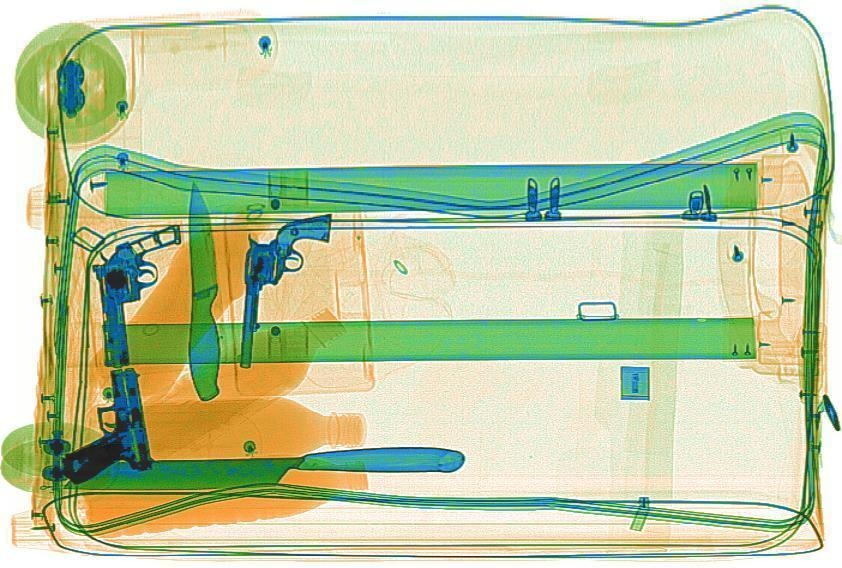

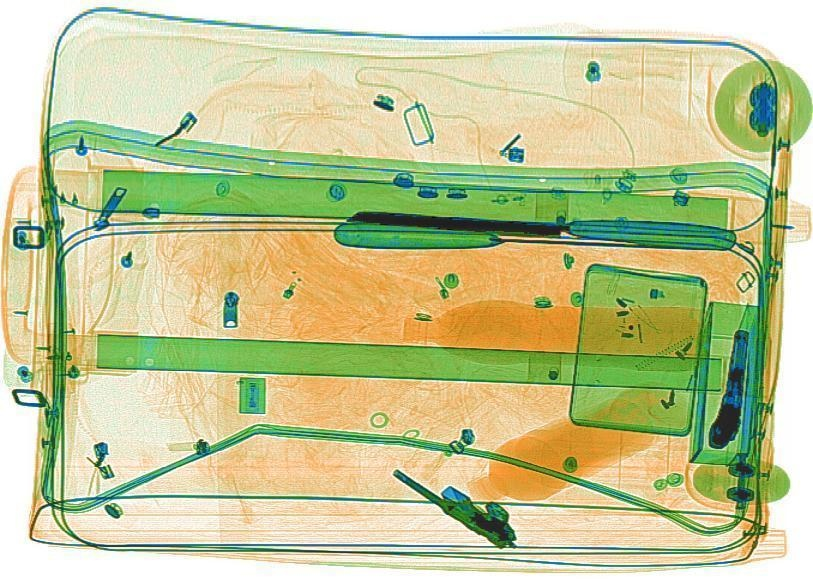

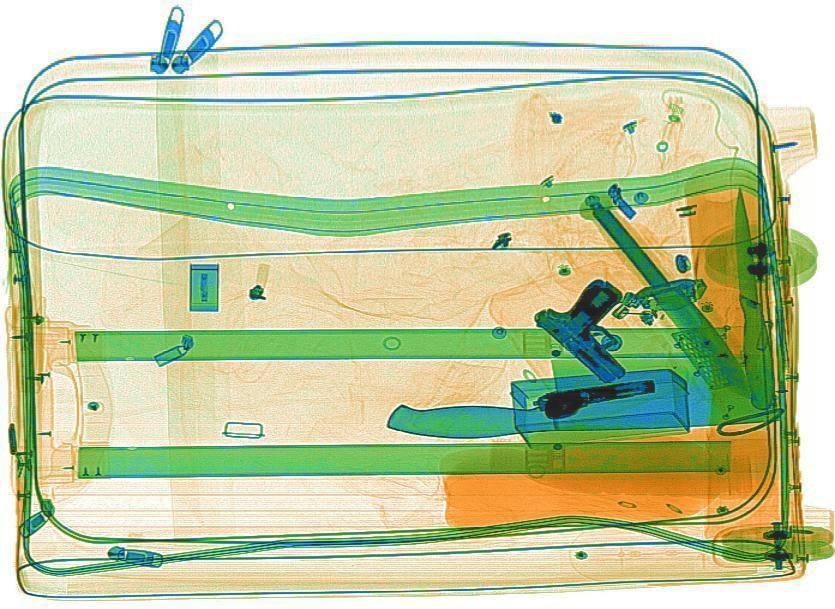

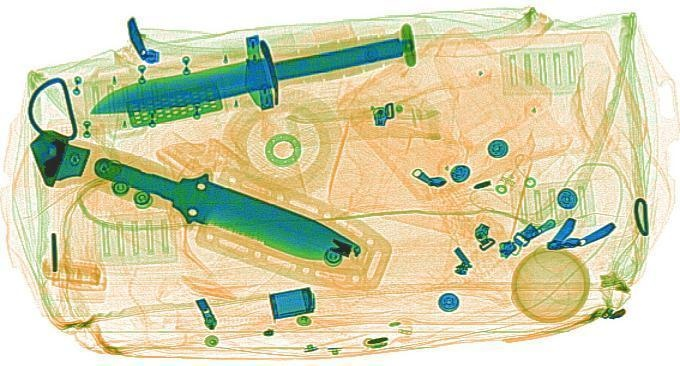

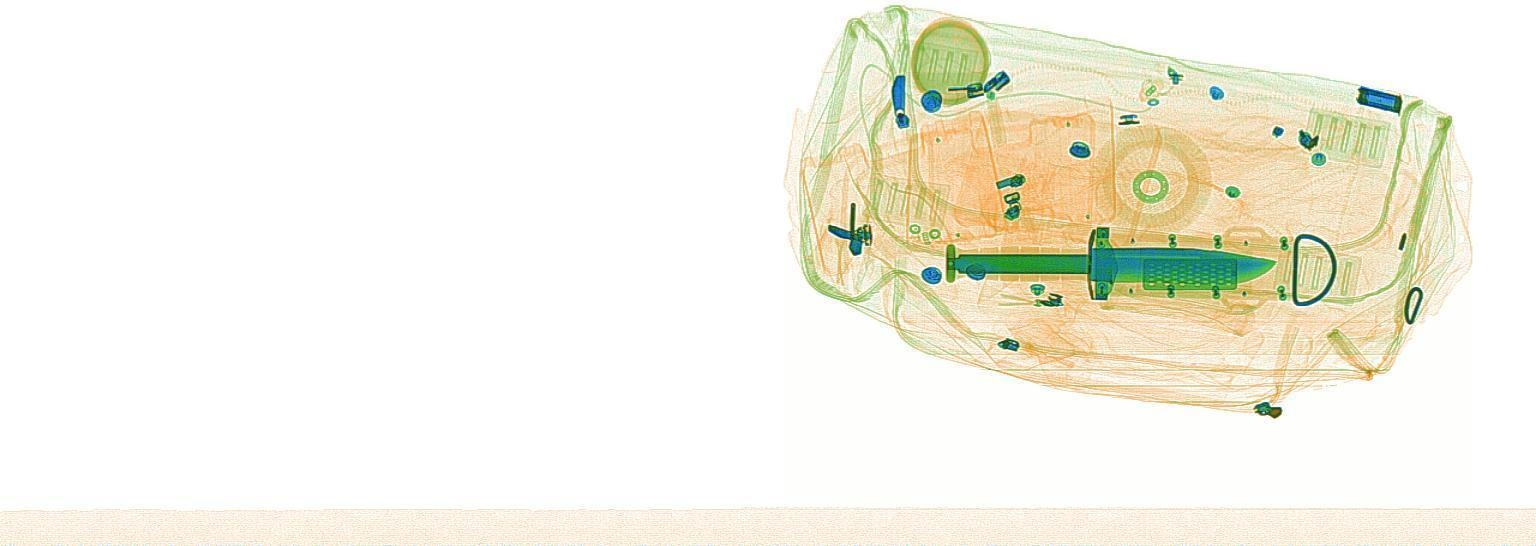

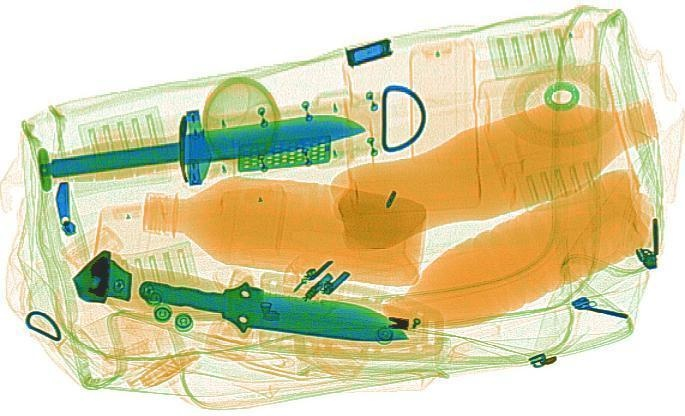

In [10]:
yolo8_model_detection=YOLO('YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/sixray100-1/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-10:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)



image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 11.5ms
Speed: 2.6ms preprocess, 11.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


val: Scanning /kaggle/working/datasets/sixray100-1/sixray100-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:00<00:00, 35.93it/s]

                   all         20         60       0.95      0.237      0.593      0.296
Speed: 0.3ms preprocess, 19.7ms inference, 0.0ms loss, 2.2ms postprocess per image



PyTorch: starting from 'YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 1.4s, saved as 'YOLO_weights/SIXray_Output/weights/best.torchscript' (11.9 MB)

Export complete (1.5s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640 data=sixray100-1/data.yaml  
Visualize:       https://netron.app
Loading YOLO_weights/SIXray_Output/weights/best.torchscript for TorchScript inference...

image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x640 (no detections), 4.0ms
Speed: 2.6ms preprocess, 4.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Loading YOLO_weights/

val: Scanning /kaggle/working/datasets/sixray100-1/sixray100-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:00<00:00, 86.89it/s]

                   all         20         60      0.925      0.224      0.511      0.282
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 2.4ms postprocess per image

PyTorch: starting from 'YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)



ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 0.8s, saved as 'YOLO_weights/SIXray_Output/weights/best.onnx' (11.7 MB)

Export complete (0.8s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=YOLO_weights/SIXray_Output/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=YOLO_weights/SIXray_Output/weights/best.onnx imgsz=640 data=sixray100-1/data.yaml  
Visualize:       https://netron.app
Loading YOLO_weights/SIXray_Output/weights/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
  Obtaining dependency information for onnxruntime-gpu from https://files.pythonhosted.org/packages/ac/c2/7f5cb0f

val: Scanning /kaggle/working/datasets/sixray100-1/sixray100-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:00<00:00, 62.37it/s]

                   all         20         60      0.925      0.224      0.511      0.282
Speed: 0.6ms preprocess, 8.1ms inference, 0.0ms loss, 2.7ms postprocess per image
ERROR ❌️ Benchmark failure for OpenVINO: inference not supported on GPU

PyTorch: starting from 'YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirement ['nvidia-tensorrt'] not found, attempting AutoUpdate...


Looking in indexes: https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.9/340.9 MB 235.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.1/333.1 MB 234.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 264.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.3/719.3 MB 203.4 MB/s eta 0:00:0000:0100:01
  Created wheel for nvidia-cublas-cu11: filename=nvidia_cublas_cu11-2022.4.8-py3-none-any.whl size=15604 sha256=519e90c4a267e141603cdf1a3c83eed6b4c1b7be4df3d7190bcad95824a531b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-hbx60hh7/wheels/8f/ed/66/aa1caefa04698673b59e1799fface640a8f6e840